In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[0.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

In [2]:
class XOROperator:
    def __init__(self):
        self.W1 = torch.tensor([[random.uniform(-1, 1), random.uniform(-1, 1)], [random.uniform(-1, 1), random.uniform(-1, 1)]],
            requires_grad=True)
        self.b1 = torch.tensor([[random.uniform(-1, 1), random.uniform(-1, 1)]],
            requires_grad=True)
        self.W2 = torch.tensor([[random.uniform(-1, 1)], [random.uniform(-1, 1)]],
            requires_grad=True)
        self.b2 = torch.tensor([[random.uniform(-1, 1)]],
            requires_grad=True)
        
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)

    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)

    def f(self, x):
        return self.f2(self.f1(x))

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy(self.f(x), y)

model = XOROperator()

In [3]:
optimizer = torch.optim.SGD([model.b1, model.b2, model.W1, model.W2], 0.01)
for epoch in range(200000):
    model.loss(x_train, y_train).backward()
    optimizer.step()

    optimizer.zero_grad()

print(f'W1 = {model.W1}, W2 = {model.W2}, b1 = {model.b1}, b2 = {model.b2}, loss = {model.loss(x_train.reshape(-1, 2), y_train)}')

W1 = tensor([[6.9372, 5.2544],
        [6.9358, 5.2541]], requires_grad=True), W2 = tensor([[ 11.3724],
        [-12.1097]], requires_grad=True), b1 = tensor([[-3.1328, -8.0420]], requires_grad=True), b2 = tensor([[-5.2896]], requires_grad=True), loss = 0.0065043047070503235


/tmp/ipykernel_37898/1527117996.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


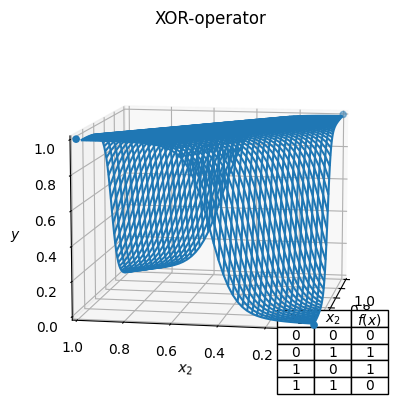

In [4]:
fig = plt.figure('Oppgave C')
ax = fig.gca(projection='3d')
plt.title('XOR-operator')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.table(cellText=[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
          colWidths=[0.1] * 3,
          colLabels=["$x_1$", "$x_2$", "$f(x)$"],
          cellLoc="center",
          loc="lower right")

x1 = np.arange(0, 1, 0.02)
x2 = np.arange(0, 1, 0.02)

y = np.empty([len(x1), len(x2)], dtype=np.double)
for t in range(len(x1)):
    for r in range(len(x2)):
        y[t, r] = float(model.f(torch.tensor([float(x1[t]), float(x2[r])])))

x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_wireframe(x1, x2, np.array(y))

xer = [float(x[0]) for x in x_train]
yer = [float(x[1]) for x in x_train]
ax.scatter(xer, yer, y_train)

float(model.f(torch.tensor([1.0, 0.0])))

ax.view_init(elev=10, azim=-170)

plt.show()